In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.model_selection import cross_validate,KFold
import warnings
warnings.filterwarnings('ignore')

# 1. Data Perparation 

Kaggle Competition: House Prices - Advanced Regression Techniques

https://www.kaggle.com/c/house-prices-advanced-regression-techniques#

In [136]:
# read data

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [137]:
df_train.shape

(1460, 81)

In [138]:
df_test.shape

(1459, 80)

In [277]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# 2. Analysing response - SalePrice

In [5]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

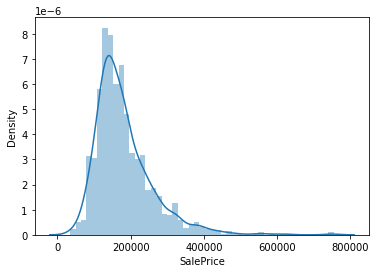

In [6]:
sns.distplot(df_train['SalePrice'])

In [7]:
df_train['SalePrice']=np.log(df_train['SalePrice'])

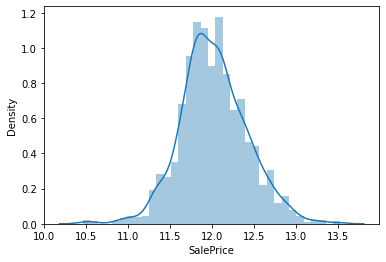

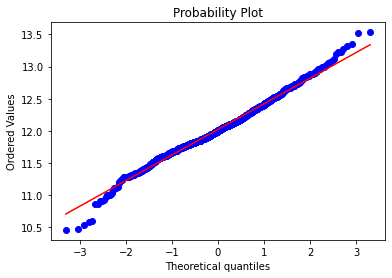

In [8]:
sns.distplot(df_train['SalePrice'])
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [9]:
# object columns (43)
object_columns_train = df_train.select_dtypes('object').columns.tolist()

In [10]:
# numerical columns (38)
numerical_columns_train = df_train.select_dtypes(['int64','float64']).columns.tolist()
df_train[numerical_columns_train].describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,12.024051
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,0.399452
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,10.460242
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,11.775097
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,12.001505
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,12.273731
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,13.534473


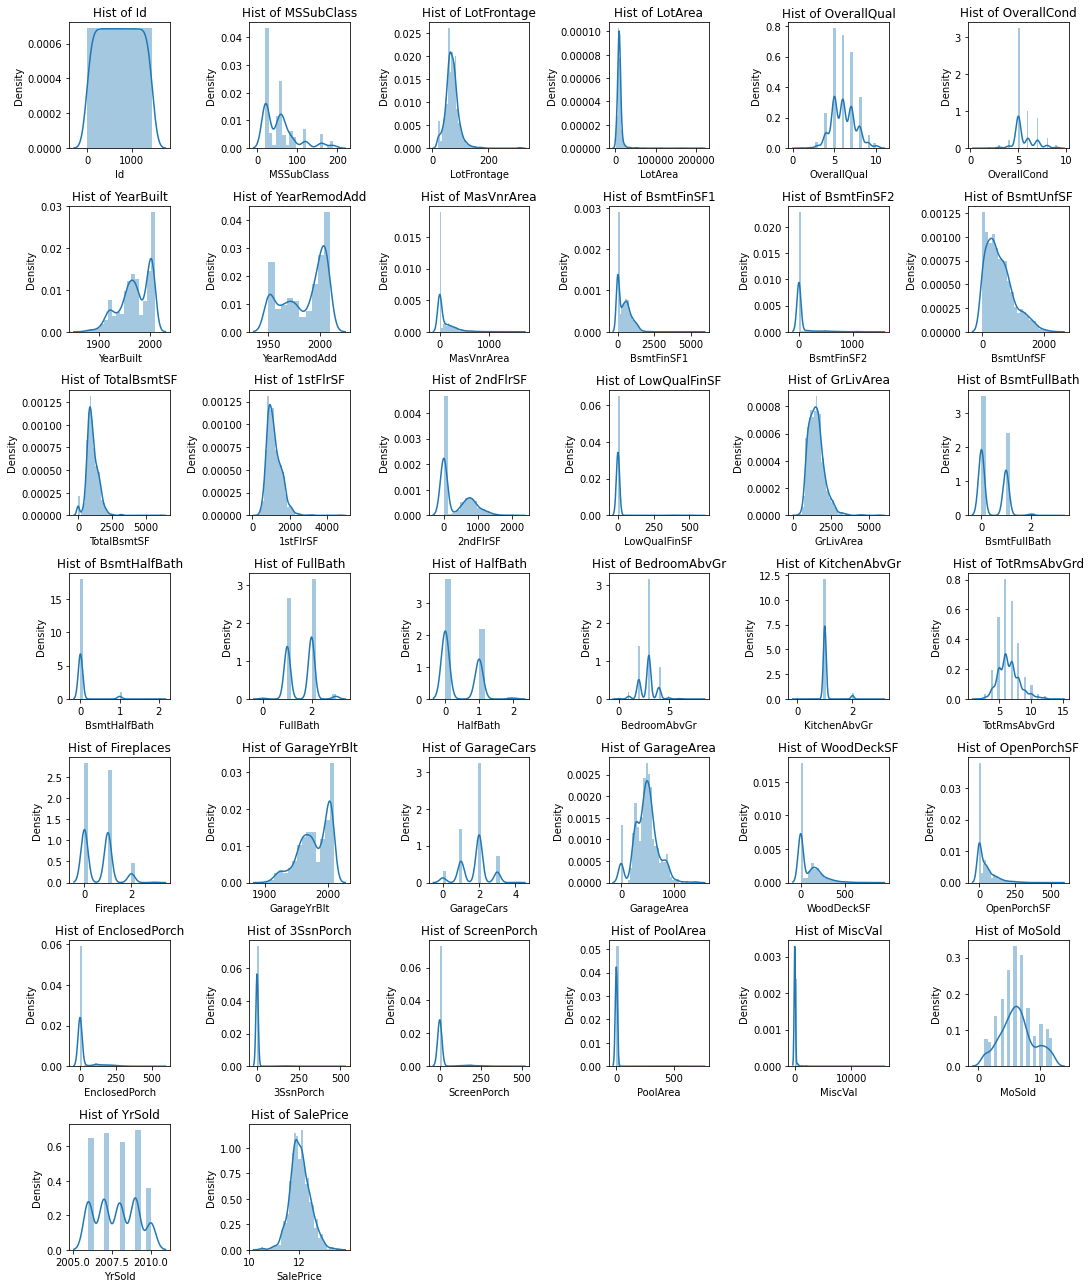

In [11]:
# histgram of numerical variables 
plt.figure(figsize=(15,18))
for i, col in enumerate(df_train[numerical_columns_train]):
    plt.subplot(7,6,i+1); sns.distplot(df_train[col])
    plt.title(f'Hist of {col}')
plt.tight_layout()
plt.show()

# 3. Relationship between response and predictors 


Three scatter plots were plotted to show the relationship on SalePrice with GrlivArea,GrlivArea and OverallQual.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

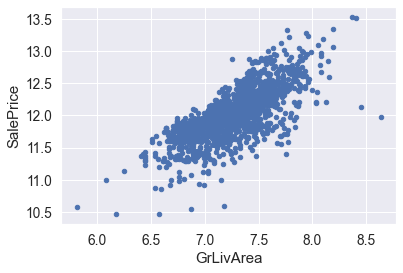

In [293]:
# SalePrice-GrlivArea
data = pd.concat([df_train['SalePrice'],df_train['GrLivArea']],axis=1)
data.plot.scatter(x='GrLivArea',y='SalePrice')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

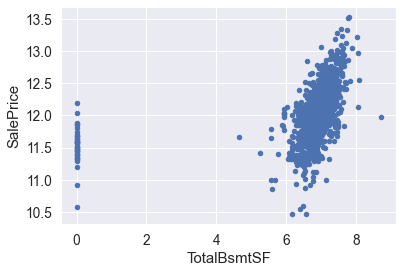

In [294]:
# SalePrice-GrlivArea
data = pd.concat([df_train['SalePrice'],df_train['TotalBsmtSF']],axis=1)
data.plot.scatter(x='TotalBsmtSF',y='SalePrice')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

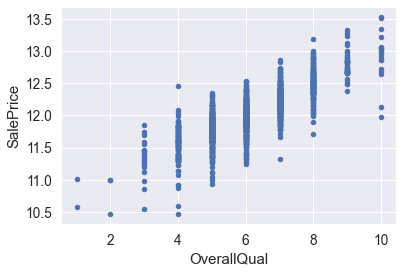

In [295]:
# SalePrice-OverallQual
data = pd.concat([df_train['SalePrice'],df_train['OverallQual']],axis=1)
data.plot.scatter(x='OverallQual',y='SalePrice')

From the graph above, we can try boxplot on overallQual because of the continues feature of overallQual.

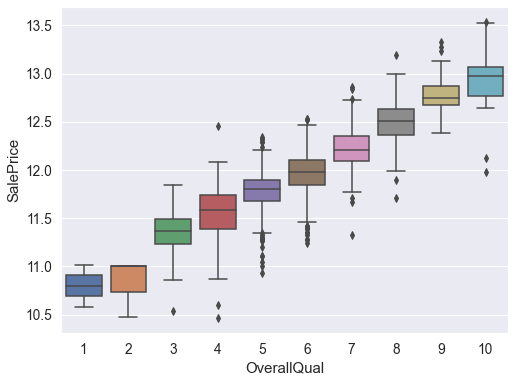

In [296]:
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x='OverallQual',y='SalePrice',data=df_train)
plt.show()

The boxplot shows a positive relationship between them. The sale price increases with a higher OverallQual.

<AxesSubplot:>

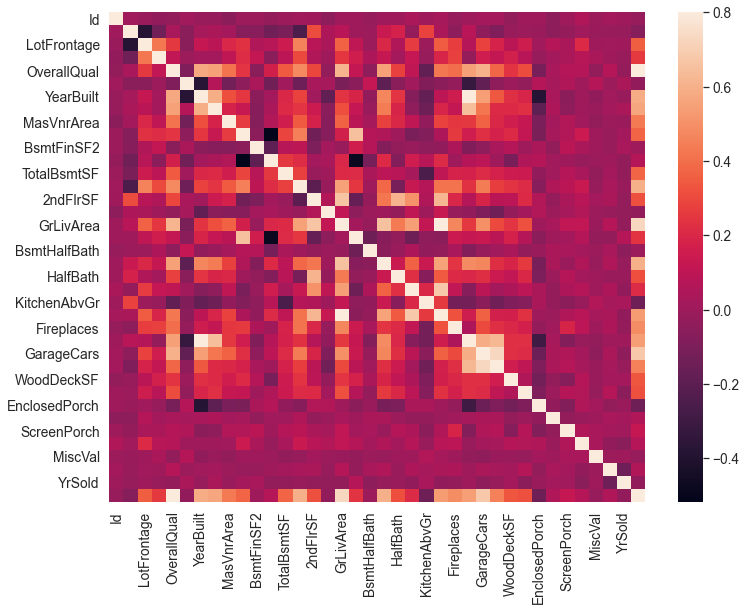

In [297]:
# correlation matrix (heatmap)
corrmat = df_train.corr()
fig,ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=0.8)

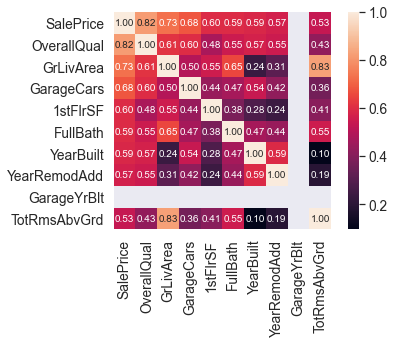

In [298]:
# look closer to saleprice 
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

We can see OverallQual, GrLivArea are strongly related with saleprice. What's more, GarageArea and GarageCars are highly related  which makes sense. TotalBsmtSF and 1stFLrSF are highly ralated. These variables are collinearity. They will influence the model performance in linear model. However, in this project, I am going to use decision tree and random forest models. 

# 4. Data Cleaning 

In [139]:
x_train = df_train.iloc[:,:-1]
y_train = df_train.iloc[:,-1]

In [140]:
all_data = pd.concat([x_train,df_test])

In [141]:
all_data.shape

(2919, 80)

In [142]:
# missing vaule
all_data_na_num = all_data.isnull().sum().sort_values(ascending=False)
all_data_na_num = all_data_na_num.drop(all_data_na_num[all_data_na_num==0].index)
all_data_na_percent = ((all_data.isnull().sum()/len(all_data))*100).sort_values(ascending=False)
all_data_na_percent = all_data_na_percent.drop(all_data_na_percent[all_data_na_percent==0].index)

missing_data = pd.concat([all_data_na_num,all_data_na_percent],axis=1,keys=['Missing_number','Missing_Ratio'])
missing_data

,Missing_number,Missing_Ratio
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageYrBlt,159,5.447071
GarageFinish,159,5.447071
GarageQual,159,5.447071
GarageCond,159,5.447071


In [143]:
c1=('PoolQC','MiscFeature','Alley','Fence','FireplaceQu'
  ,'GarageType', 'GarageFinish', 'GarageQual','GarageCond'
  ,'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1'
   ,'BsmtFinType2','MasVnrArea','MasVnrType','MSSubClass')

for i in c1:
    all_data[i]=all_data[i].fillna('None')

In [144]:
c2 = ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath'
      ,'BsmtHalfBath','GarageYrBlt', 'GarageArea' ,'GarageCars')
for i in c2:
    all_data[i]=all_data[i].fillna(0)

In [145]:
all_data = all_data.drop(['Utilities'], axis=1)

**As for the features below, we use the median number and mode number  to fill train dataset and test data set separately.**

In [146]:
x_train = all_data.iloc[:1460,]
df_test = all_data.iloc[1460:,]

In [147]:
x_train.shape

(1460, 79)

In [148]:
df_test.shape

(1459, 79)

In [149]:
x_train['LotFrontage'] = x_train.groupby('Neighborhood')['LotFrontage'].transform(
lambda x:x.fillna(x.median()))

In [150]:
df_test['LotFrontage'] = df_test.groupby('Neighborhood')['LotFrontage'].transform(
lambda x:x.fillna(x.median()))

In [151]:
c3 = ('MSZoning','Electrical','KitchenQual','Exterior1st','Exterior2nd','SaleType','Functional')

for i in c3:
    x_train[i] = x_train[i].fillna(x_train[i].mode()[0])

In [152]:
c3 = ('MSZoning','Electrical','KitchenQual','Exterior1st','Exterior2nd','SaleType','Functional')

for i in c3:
    df_test[i] = df_test[i].fillna(df_test[i].mode()[0])

In [153]:
all_data = pd.concat([x_train,df_test])
max(all_data.isnull().sum())

0

We drop one column and use none, o, mode, and median to fill null. Now there is no missing value in the train and test datasets. 

# 5 Data Transformation

Also we can see there are 43 categorical variables and four variables about year. They are YearBuilt,YearRemodAdd,GarageYrBlt,YrSold.

We also need to encode these year together with categorical variables and transform numerical variables

In [154]:
# object columns (43)
object_columns = x_train.select_dtypes('object').columns.tolist()

In [155]:
# numerical columns (36)
numerical_columns = x_train.select_dtypes(['int64','float64']).columns.tolist()

In [156]:
len(numerical_columns)

36

In [157]:
year = ['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']

for i in year:
    object_columns.append(i)

Process columns, apply LabelEncoder to categorical features on train data set and test data set sperately.

In [158]:
# train dataset label encoder
from sklearn.preprocessing import LabelEncoder

for c in object_columns:
    lable_en_train = LabelEncoder() 
    lable_en_train.fit(list(x_train[c].values)) 
    x_train[c]= lable_en_train.transform(list(x_train[c].values))

In [159]:
# test dataset label encoder
for c in object_columns:
    lable_en_test = LabelEncoder() 
    lable_en_test.fit(list(df_test[c].values)) 
    df_test[c]= lable_en_test.transform(list(df_test[c].values))

**Numerical variables**

In [33]:
y_train=np.log(y_train)

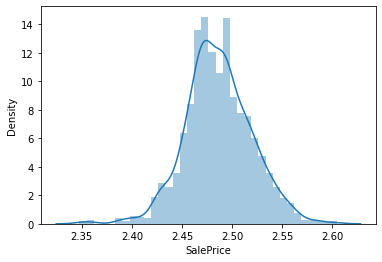

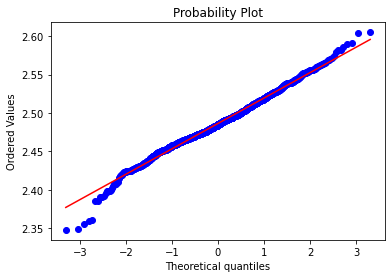

In [34]:
sns.distplot(y_train)
fig = plt.figure()
res = stats.probplot(y_train, plot=plt)

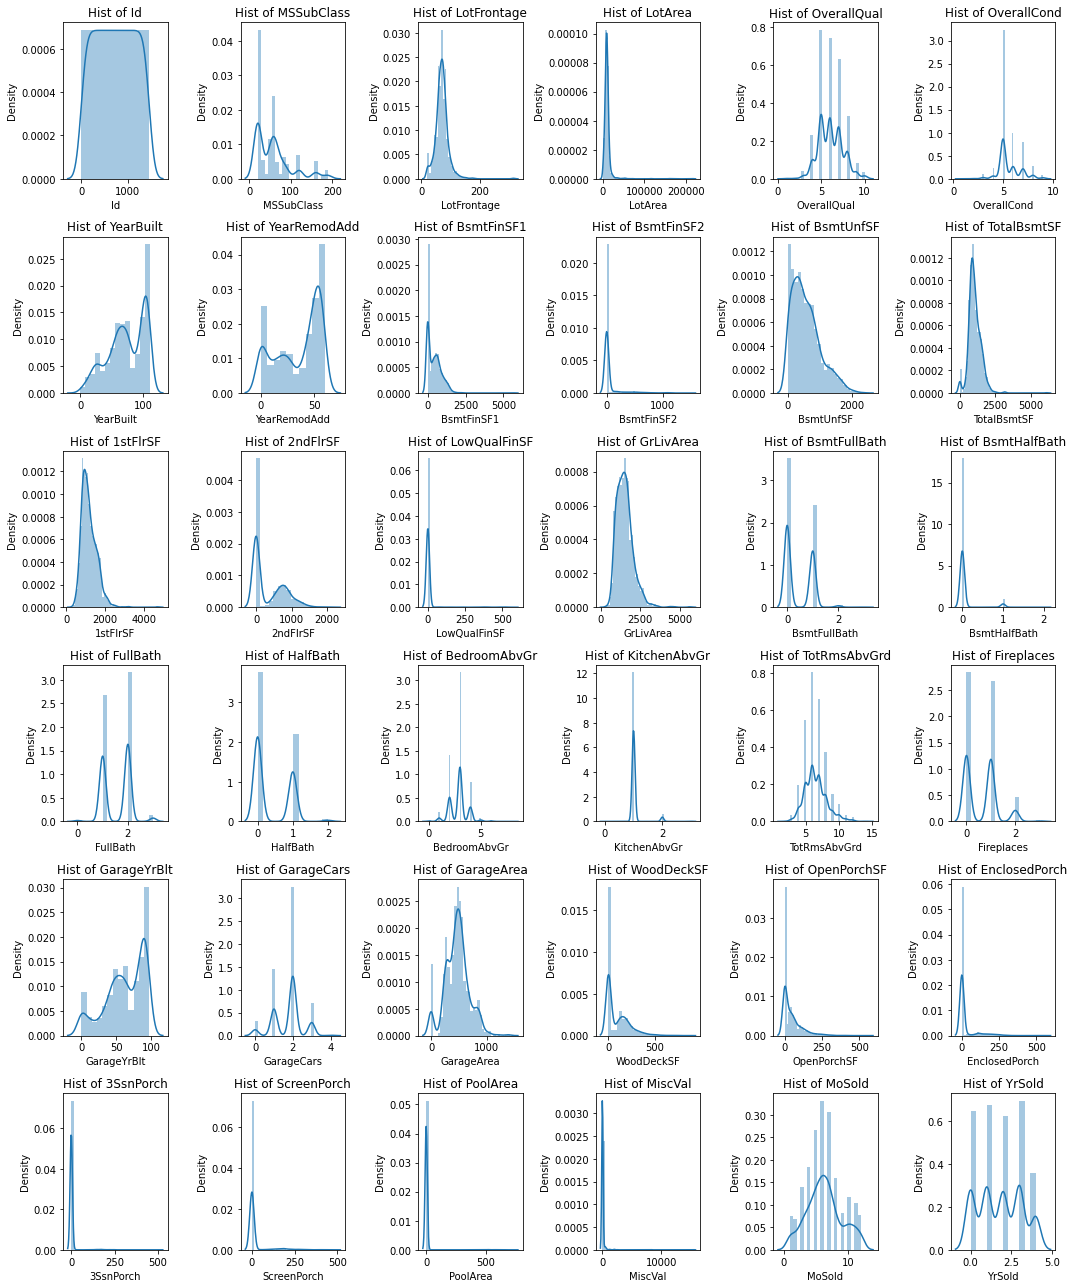

In [36]:
# histgram of numerical variables 
plt.figure(figsize=(15,18))
for i, col in enumerate(x_train[numerical_columns]):
    plt.subplot(6,6,i+1); sns.distplot(x_train[col])
    plt.title(f'Hist of {col}')
plt.tight_layout()
plt.show()

From the histogram, BsmtUnfSF, TotalBsmtSF, GrLivArea, GarageArea are not normal distributed.  They are not normal.Log transformation will work. 

In [37]:
x_train['GrLivArea']=np.log(x_train['GrLivArea'])

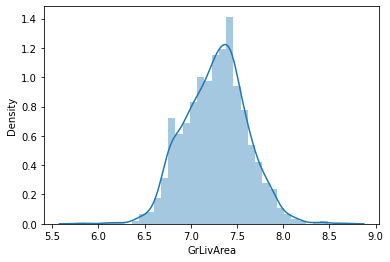

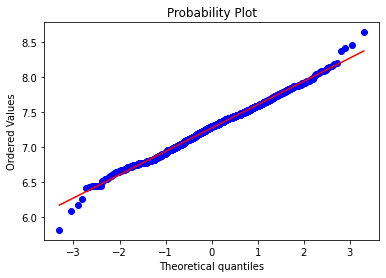

In [38]:
sns.distplot(x_train['GrLivArea'])
fig = plt.figure()
res = stats.probplot(x_train['GrLivArea'], plot=plt)

In [39]:
# choose the houses which have basement and transfrom the basement area data of them.
x_train.loc[x_train['TotalBsmtSF']>0,'TotalBsmtSF']=np.log(x_train['TotalBsmtSF'])

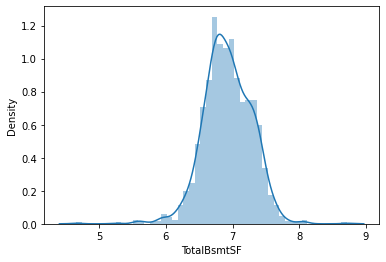

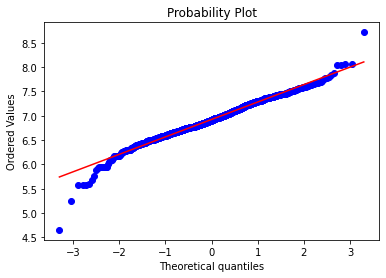

In [40]:
sns.distplot(x_train[x_train['TotalBsmtSF']>0]['TotalBsmtSF'])
fig = plt.figure()
res = stats.probplot(x_train[x_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

In [41]:
# choose the houses which have garage and transfrom the garage area data of them.
x_train.loc[x_train['GarageArea']>0,'GarageArea']= np.log(x_train['GarageArea'])

In [3]:
sns.displot(x_train[df_train['GarageArea']>0]['GarageArea'])
fig = plt.figure()
res = stats.probplot(x_train[x_train['GarageArea']>0]['GarageArea'], plot=plt)

NameError: name 'sns' is not defined

In [46]:
pd.set_option('max_columns',80)
x_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,3,65.0,8450,1,1,3,3,4,0,5,2,2,0,5,7,5,104,53,1,1,12,13,1,84,2,4,2,2,4,3,2,706.0,6,0.0,150.0,6.752270,1,0,1,4,856,854,0,7.444249,1.0,0.0,2,1,3,1,2,8,6,0,3,1,90,2,2.0,6.306275,5,5,2,0,61,0,0,0,0,3,4,1,0,2,2,8,4
1,2,20,3,80.0,9600,1,1,3,3,2,0,24,1,2,0,2,6,8,77,26,1,1,8,8,2,0,3,4,1,2,4,1,0,978.0,6,0.0,284.0,7.140453,1,0,1,4,1262,0,0,7.140453,0.0,1.0,2,0,3,1,3,6,6,1,5,1,63,2,2.0,6.131226,5,5,2,298,0,0,0,0,0,3,4,1,0,5,1,8,4
2,3,60,3,68.0,11250,1,1,0,3,4,0,5,2,2,0,5,7,5,102,52,1,1,12,13,1,59,2,4,2,2,4,2,2,486.0,6,0.0,434.0,6.824374,1,0,1,4,920,866,0,7.487734,1.0,0.0,2,1,3,1,2,6,6,1,5,1,88,2,2.0,6.410175,5,5,2,0,42,0,0,0,0,3,4,1,0,9,2,8,4
3,4,70,3,60.0,9550,1,1,0,3,0,0,6,2,2,0,5,7,5,19,20,1,1,13,15,2,0,3,4,0,4,1,3,0,216.0,6,0.0,540.0,6.628041,1,2,1,4,961,756,0,7.448334,1.0,0.0,1,0,3,1,2,7,6,1,2,5,85,3,3.0,6.464588,5,5,2,0,35,272,0,0,0,3,4,1,0,2,0,8,0
4,5,60,3,84.0,14260,1,1,0,3,2,0,15,2,2,0,5,8,5,101,50,1,1,12,13,1,185,2,4,2,2,4,0,2,655.0,6,0.0,490.0,7.043160,1,0,1,4,1145,1053,0,7.695303,1.0,0.0,2,1,4,1,2,9,6,1,5,1,87,2,3.0,6.728629,5,5,2,192,84,0,0,0,0,3,4,1,0,12,2,8,4


**Data transfrom on test dataset**

In [43]:
df_test['GrLivArea']=np.log(df_test['GrLivArea'])

In [44]:
df_test.loc[df_test['TotalBsmtSF']>0,'TotalBsmtSF']=np.log(df_test['TotalBsmtSF'])

In [45]:
df_test.loc[df_test['GarageArea']>0,'GarageArea']= np.log(df_test['GarageArea'])

# 6 Model Building 

We are going to build a desicion tree model and  a bagging ensemble learning model, random forest model. We use randomized SearchCV to find the best perematers. 

## Step 1  Build  Benchmark

In [190]:
# decision tree
reg_t = DTR()

In [191]:
cv = KFold(n_splits = 5, shuffle = True, random_state = 1314)

In [192]:
result_t =  cross_validate(reg_t
                           ,x_train,y_train
                           ,cv=cv
                           ,scoring='neg_mean_squared_error'
                           ,return_train_score=True
                           )

In [193]:
result_t

{'fit_time': array([0.04616499, 0.02915382, 0.02038503, 0.01932311, 0.01958179]),
 'score_time': array([0.00267696, 0.0016849 , 0.00099206, 0.00098586, 0.00098014]),
 'test_score': array([-3.01170231e+09, -1.40112295e+09, -1.48487166e+09, -1.91120399e+09,
        -1.22498076e+09]),
 'train_score': array([-0., -0., -0., -0., -0.])}

High score on train dataset while not good score on test dataset so decision tree model is overfitted based on default parameters.  

In [194]:
# random forest 
reg_f = RFR(random_state=1314)

In [195]:
result_f =  cross_validate(reg_f
                           ,x_train,y_train
                           ,cv=cv
                           ,scoring='neg_mean_squared_error'
                           ,return_train_score=True
                           )

In [196]:
result_f

{'fit_time': array([1.18618011, 1.1424861 , 1.13549519, 1.13076782, 1.12763691]),
 'score_time': array([0.00816798, 0.00808191, 0.00791764, 0.00786304, 0.00799632]),
 'test_score': array([-2.06916610e+09, -5.55302378e+08, -6.59827690e+08, -8.36505239e+08,
        -5.58393788e+08]),
 'train_score': array([-1.00641216e+08, -1.26060560e+08, -1.41599000e+08, -1.24778681e+08,
        -1.37354671e+08])}

Random forest perform better on test dataset and is not overfitted as decision tree. 

In [182]:
def RMSE(cvresult,key):
    return(abs(cvresult[key])**0.5).mean()

In [183]:
RMSE(result_f,'train_score')

10947.444447571626

In [184]:
RMSE(result_f,'test_score')

29433.53153564949

Next step is to set parameters. In raomdom forest model. max_depth,max_features have big influence on single dicision tree. They can avoid overfitting and build different trees. min_samples_split, min_impurity_decrease, max_leaf_nodes, criterion have small influence. Well, for bagging model, it is better to have different and dependent base estimators. So we use some parameters like max_samples, boostrap, max_features to add randomnality in order to improve the performance of model. 

## Step 2 Find parameter space


In [185]:
Option = [1,*range(5,101,5)]

In [187]:
trainRMSE = np.array([])
testRMSE = np.array([])
trainSTD = np.array([])
testSTD = np.array([])

for n_estimators in Option:
    reg_f = RFR(n_estimators=n_estimators,random_state=1314)
    cv = KFold(n_splits=5,shuffle=True,random_state=1412)
    result_f = cross_validate(reg_f,x_train,y_train,cv=cv,scoring="neg_mean_squared_error"
                              ,return_train_score=True
                              ,n_jobs=-1)
    
    train = abs(result_f["train_score"])**0.5
    test = abs(result_f["test_score"])**0.5
    
    trainRMSE = np.append(trainRMSE,train.mean()) 
    testRMSE = np.append(testRMSE,test.mean())
    trainSTD = np.append(trainSTD,train.std()) 
    testSTD = np.append(testSTD,test.std())

In [188]:
def plotCVresult(Option,trainRMSE,testRMSE,trainSTD,testSTD):
    
    xaxis = Option
    plt.figure(figsize=(8,6),dpi=80)

    
    plt.plot(xaxis,trainRMSE,color="k",label = "RandomForestTrain")
    plt.plot(xaxis,testRMSE,color="red",label = "RandomForestTest")

    
    plt.plot(xaxis,trainRMSE+trainSTD,color="k",linestyle="dotted")
    plt.plot(xaxis,trainRMSE-trainSTD,color="k",linestyle="dotted")
    plt.plot(xaxis,testRMSE+testSTD,color="red",linestyle="dotted")
    plt.plot(xaxis,testRMSE-testSTD,color="red",linestyle="dotted")
    plt.xticks([*xaxis])
    plt.legend(loc=1)
    plt.show()

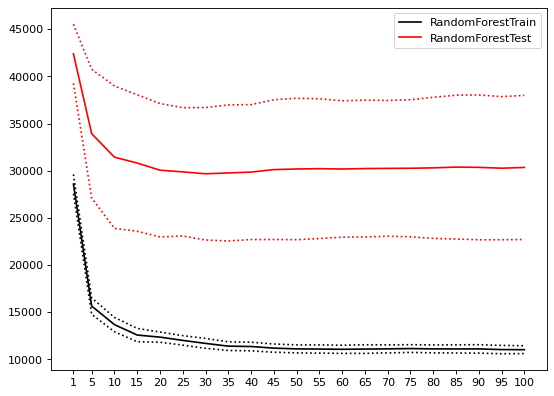

In [189]:
plotCVresult(Option,trainRMSE,testRMSE,trainSTD,testSTD)

we set n_estimators to range(20,100,5), more number of trees in order to offer more trees when building simpler trees with other parameters. 

In [201]:
reg_f = RFR(n_estimators=100,random_state=1314)
reg_f = reg_f.fit(x_train,y_train)

In [202]:
depth = pd.Series([],dtype='int64')
for index,t in enumerate(reg_f.estimators_):
    depth[index]=t.tree_.max_depth

In [204]:
depth.describe()

count    100.000000
mean      21.840000
std        1.818646
min       18.000000
25%       21.000000
50%       22.000000
75%       23.000000
max       27.000000
dtype: float64

we choose max_depth around 10-25.

In [208]:
# min_impurity_decrease
pd.Series(reg_f.estimators_[0].tree_.threshold).value_counts().sort_index()

1.0        26
1.5        53
2.0        32
2.5        43
3.0        22
           ..
13530.0     1
14566.5     1
15470.5     1
17393.5     1
44803.5     1
Length: 453, dtype: int64

In [210]:
pd.set_option("display.max_rows",None)
np.cumsum(pd.Series(reg_f.estimators_[0].tree_.threshold).value_counts().sort_index()[1:])

1.00         26
1.50         79
2.00        111
2.50        154
3.00        176
3.50        204
4.00        222
4.50        237
5.00        242
5.50        263
6.00        266
6.50        282
7.00        289
7.50        300
8.00        303
8.50        308
9.00        314
9.50        317
10.00       320
10.50       324
11.00       325
11.50       329
12.00       330
12.50       332
13.00       334
13.50       335
14.00       337
14.50       338
15.00       339
15.50       341
16.50       342
17.50       343
18.50       344
19.00       346
19.50       349
20.50       350
21.00       351
22.50       352
25.00       353
26.00       355
28.50       356
31.00       357
32.50       358
34.50       359
35.50       360
36.00       361
37.00       363
37.50       366
38.00       368
38.50       369
39.00       370
40.50       372
41.00       373
41.50       374
42.50       375
43.00       377
43.50       379
44.00       380
44.50       382
45.00       384
46.50       385
47.00       386
47.50   

as we can see we need to set min_impurity_decrease to [2,10] to reduce to divide more leaves. 

In [230]:
param_grid_simple = {'n_estimators': [*range(20,100,5)]
                     , 'max_depth': [*range(10,25,1)]
                     , "max_features": ["log2","sqrt",16,32,64,"auto"]
                     , "min_impurity_decrease": [*np.arange(0,5,10)]}

## Step 3 Use Randomized Search Cv to find best parameters

In [258]:
def count_space(param):
    no_option = 1
    for i in param_grid_simple:
        no_option *= len(param_grid_simple[i])
    print(no_option)  

In [245]:
count_space(param_grid_simple)

1440


In [239]:
from sklearn.model_selection import RandomizedSearchCV
import time

In [240]:
reg = RFR(random_state = 1314, verbose = True,n_jobs=-1)
cv = KFold(n_splits=5,shuffle=True,random_state=1314)

search = RandomizedSearchCV(estimator=reg
                            ,param_distributions=param_grid_simple
                            ,n_iter = 700
                            ,scoring = "neg_mean_squared_error"
                            ,verbose = True
                            ,cv = cv
                            ,random_state=1314
                            ,n_jobs=-1)

In [241]:
start = time.time()
search.fit(x_train,y_train)
end = time.time() - start
print(end/60)

Fitting 5 folds for each of 700 candidates, totalling 3500 fits
4.023895478248596


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


In [242]:
search.best_estimator_

RandomForestRegressor(max_depth=15, max_features=16, min_impurity_decrease=0,
                      n_estimators=50, n_jobs=-1, random_state=1314,
                      verbose=True)

In [247]:
abs(search.best_score_)**0.5

29048.518907776815

Change parameter space to more accurate and dense to see if we can get a better performance 

In [251]:
param_grid_simple = {'n_estimators': [*range(50,100,2)]
                     , 'max_depth': [*range(10,25,1)]
                     , "max_features": [*range(10,20,1)]}

In [252]:
search = RandomizedSearchCV(estimator=reg
                            ,param_distributions=param_grid_simple
                            ,n_iter = 700
                            ,scoring = "neg_mean_squared_error"
                            ,verbose = True
                            ,cv = cv
                            ,random_state=1314
                            ,n_jobs=-1)

In [253]:
count_space(param_grid_simple)

3750


In [254]:
search = RandomizedSearchCV(estimator=reg
                            ,param_distributions=param_grid_simple
                            ,n_iter = 700
                            ,scoring = "neg_mean_squared_error"
                            ,verbose = True
                            ,cv = cv
                            ,random_state=1314
                            ,n_jobs=-1)

In [255]:
start = time.time()
search.fit(x_train,y_train)
end = time.time() - start
print(end/60)

Fitting 5 folds for each of 700 candidates, totalling 3500 fits
2.9559516509373984


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  88 out of  88 | elapsed:    0.1s finished


In [263]:
abs(search.best_score_)**0.5

28960.14213960734

In [260]:
search.best_estimator_

RandomForestRegressor(max_depth=21, max_features=19, n_estimators=88, n_jobs=-1,
                      random_state=1314, verbose=True)

In [264]:
#v rebuild_on_best_param

cv = KFold(n_splits=5,shuffle=True,random_state=1314)
result_post_adjusted = cross_validate(search.best_estimator_,x_train,y_train,cv=cv,scoring="neg_mean_squared_error"
                                    ,return_train_score=True
                                    ,verbose=True
                                    ,n_jobs=-1)
print("训练RMSE:{:.3f}".format(RMSE(result_post_adjusted,"train_score")))
print("测试RMSE:{:.3f}".format(RMSE(result_post_adjusted,"test_score")))
  

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


训练RMSE:11114.235
测试RMSE:28332.089


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.6s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.6s finished


|HPO|Default parameters|Randomized search|Randomized search<br>(dense space)|
|:-:|:-:|:-:|:-:|
|Best_estimator（RMSE）|29433.532|29048.519|<font color="green">**28960.142**|
|Rebuild on dataset（RMSE）|-|-|<font color="brown">**28332.089**|

Therefore, until now we use randomized search CV to find the best parameters in this dataset and build the best perfromance's model. 

# 6 House Price Prediction

In [270]:
y_predict = search.best_estimator_.predict(df_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  88 out of  88 | elapsed:    0.0s finished


In [273]:
y_predict

array([126271.17768595, 152807.24512987, 181660.33982684, ...,
       157498.31818182, 107261.93181818, 232848.82954545])